In [1]:
#NOW WE'LL SEE HOW TO CHANGE THE REPRESENTATION OF DATA IF WE ARE GIVEN CATEGORICAL VARIABLES.


In [2]:
#ONE HOT ENCODING

In [27]:
import pandas as pd
data=pd.read_csv("adult.data",names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
 'marital-status', 'occupation', 'relationship', 'race', 'gender',
 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
 'occupation', 'income']]
display(data.head())




,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [15]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [20]:
dum=pd.get_dummies(data)
# list(dum.columns)#all possible combinations become 1 class
dum.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
features=dum.loc[:,'age':'occupation_ Transport-moving']

In [25]:
x=features.values
y=dum['income_ >50K'].values
print(x.shape,y.shape)

(32561, 44) (32561,)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,random_state=0)
logreg=LogisticRegression()
logreg.fit(xtr,ytr)
print("test set accuracy= ", logreg.score(xte,yte))

test set accuracy=  0.8067804937968308


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
demo_df=pd.DataFrame({'Integer f':[0,1,2,1],
                     'categorical':['socks','fox','socks','box' ]})
display(demo_df)

,Integer f,categorical
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [32]:
dum=pd.get_dummies(demo_df)
display(dum)

,Integer f,categorical_box,categorical_fox,categorical_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import matplotlib.pyplot as plt
import numpy as np

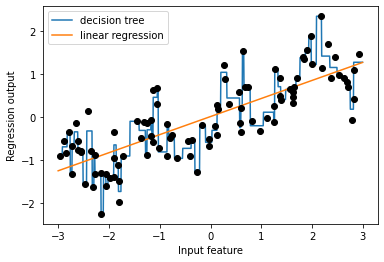

In [81]:
x,y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
reg=DecisionTreeRegressor(min_samples_split=3).fit(x,y)
plt.plot(line,reg.predict(line),label="decision tree")
reg2=LinearRegression().fit(x,y)
plt.plot(line,reg2.predict(line),label="linear regression")
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


In [82]:
bins=np.linspace(-3,3,11)
print(bins)

[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [83]:
which_bin=np.digitize(x,bins=bins)
print(x[:5]," \n ", which_bin[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]  
  [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [84]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoder.fit(which_bin)
x_binned=encoder.transform(which_bin)
print(x_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0, 'Input feature')

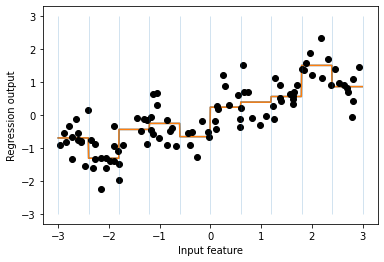

In [85]:
line_binned=encoder.transform(np.digitize(line,bins=bins))
reg=LinearRegression().fit(x_binned,y)
plt.plot(line,reg.predict(line_binned),label="linear regression")

reg2=DecisionTreeRegressor(min_samples_split=3).fit(x_binned,y)
plt.plot(line,reg2.predict(line_binned),label="linear regression")
plt.plot(x[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")


In [89]:
from sklearn.preprocessing import PolynomialFeatures
p=PolynomialFeatures(degree=10,include_bias=False)
p.fit(x)
x_p=p.transform(x)
print(x_p.shape)
df=pd.DataFrame(x_p,columns=p.get_feature_names())
display(df.head())

(100, 10)


C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9,x0^10
0,-0.752759,0.566647,-0.426548,0.321088,-0.241702,0.181944,-0.136960,0.103098,-0.077608,0.058420
1,2.704286,7.313162,19.776880,53.482337,144.631526,391.124988,1057.713767,2860.360362,7735.232021,20918.278410
2,1.391964,1.937563,2.697017,3.754150,5.225640,7.273901,10.125005,14.093639,19.617834,27.307312
3,0.591951,0.350406,0.207423,0.122784,0.072682,0.043024,0.025468,0.015076,0.008924,0.005283
4,-2.063888,4.259634,-8.791409,18.144485,-37.448187,77.288869,-159.515582,329.222321,-679.478050,1402.366700


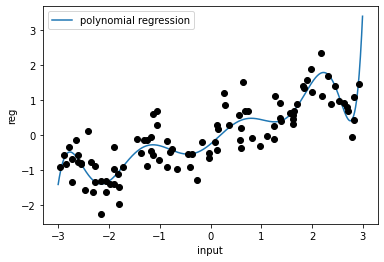

In [93]:
reg=LinearRegression().fit(x_p,y)
line_poly=p.transform(line)
plt.plot(line,reg.predict(line_poly),label='polynomial regression')
plt.plot(x[:,0],y,'o',c='k')
plt.ylabel("reg")
plt.xlabel("input")
plt.legend(loc="best")

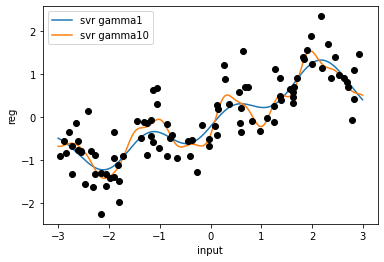

In [94]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(x,y)
    plt.plot(line,svr.predict(line),label="svr gamma{}".format(gamma))
plt.plot(x[:,0],y,'o',c='k')
plt.ylabel("reg")
plt.xlabel("input")
plt.legend(loc="best")

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

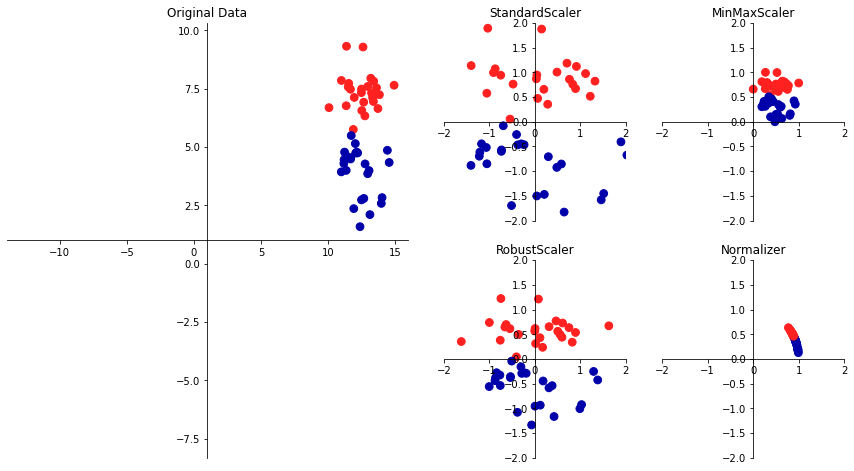

In [104]:
from sklearn.datasets import  load_boston
lb=load_boston()
df=pd.DataFrame(lb.data,columns=lb.feature_names)
mglearn.plots.plot_scaling()

In [117]:
display(df.head())
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(lb.data,lb.target,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()#scales it [0,1]
scaler.fit(xtr)
xtr_s=scaler.transform(xtr)
xte_s=scaler.transform(xte)

p=PolynomialFeatures(degree=2)
p.fit(xtr_s)
xtr_p=p.transform(xtr_s)
xte_p=p.transform(xte_s)
print(xtr_s.shape,xtr_p.shape,"\n",xte_s.shape, xte_p.shape)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(379, 13) (379, 105) 
 (127, 13) (127, 105)


In [118]:

print(p.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [125]:
from sklearn.linear_model import Ridge

r=Ridge().fit(xtr_s,ytr)
print("score without interactions of poly features=",r.score(xte_s,yte))
r2=Ridge().fit(xtr_p,ytr)
print("score with interactions between features=",r2.score(xte_p,yte))

score without interactions of poly features= 0.6214583227921032
score with interactions between features= 0.7534782020980574


In [130]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100).fit(xtr_s,ytr)
print("random forest regresson score without polynomial feature interaction",rf.score(xte_s,yte),"\n")
rf=RandomForestRegressor(n_estimators=100).fit(xtr_p,ytr)
print("random forest regresson score without polynomial feature interaction",rf.score(xte_p,yte),"\n")

random forest regresson score without polynomial feature interaction 0.8102228714027104 

random forest regresson score without polynomial feature interaction 0.7617476889793762 



<BarContainer object of 141 artists>

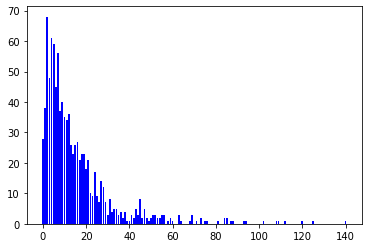

In [144]:
rnd=np.random.RandomState(0)
xorg=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)
x=rnd.poisson(10*np.exp(xorg))
y=np.dot(xorg,w)
bins=np.bincount(x[:,0])
plt.bar(range(len(bins)),bins,color='b')

0.6224186236310758


Text(0.5, 0, 'value')

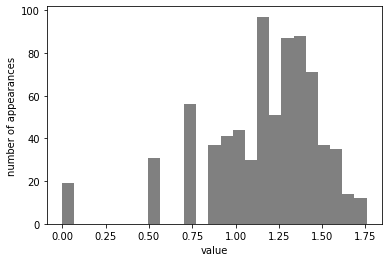

In [147]:
from sklearn.linear_model import Ridge
xtr,xte,ytr,yte=train_test_split(x,y,random_state=0)
score=Ridge().fit(xtr,ytr).score(xte,yte)
print(score)
xtr_log=np.log(xtr+1)
xte_log=np.log(xte+1)
plt.hist(np.log(xtr_log[:,0]+1),bins=25,color='gray')
plt.ylabel("number of appearances")
plt.xlabel("value")

In [174]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
from sklearn.feature_selection import SelectPercentile

rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))
xwn=np.hstack([cancer.data,noise])
xtr,xte,ytr,yte=train_test_split(xwn,cancer.target,random_state=0,test_size=0.5)
select=SelectPercentile(percentile=50)
select.fit(xtr,ytr)
xtr_sel=select.transform(xtr)
xte_sel=select.transform(xte)
print(cancer.data.shape,xwn.shape,xtr_sel.shape,xte_sel.shape,yte.shape)

(569, 30) (569, 80) (284, 40) (285, 40) (285,)


Text(0.5, 0, 'sample index')

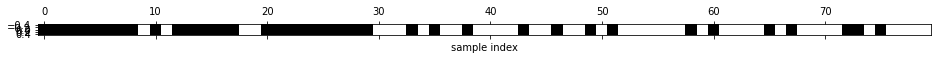

In [175]:
s=select.get_support()
plt.matshow(s.reshape(1,-1),cmap='gray_r')
plt.xlabel("sample index")



In [176]:


reg=LogisticRegression().fit(xtr,ytr)
print(reg.score(xte,yte))
reg=LogisticRegression().fit(xtr_sel,ytr)
print(reg.score(xte_sel,yte))

0.9192982456140351
0.9087719298245615


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [178]:
from sklearn.feature_selection import*
from sklearn.ensemble import RandomForestClassifier

In [182]:
select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold="median")

In [184]:
select.fit(xtr,ytr)
xtr_sel=select.transform(xtr)
print(xtr_sel.shape,xtr.shape)

(284, 40) (284, 80)


Text(0.5, 0, 'sample index')

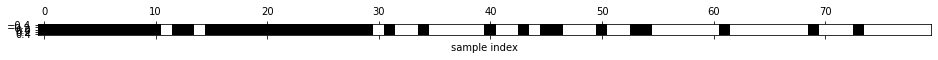

In [186]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("sample index")

In [188]:
reg=LogisticRegression().fit(xtr,ytr)
print(reg.score(xte,yte))
xte_sel=select.transform(xte)
reg=LogisticRegression().fit(xtr_sel,ytr)
print(reg.score(xte_sel,yte))

0.9192982456140351
0.9298245614035088


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

before feature selection testing accuracy= 0.9192982456140351
after feature selection testing accuracy= 0.9298245614035088


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Text(0.5, 0, 'sample index')

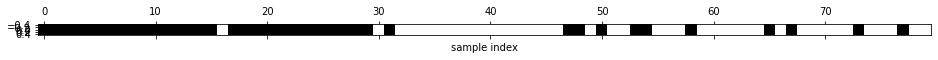

In [190]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)
select.fit(xtr,ytr)
xtr_sel=select.transform(xtr)
xte_sel=select.transform(xte)

logreg=LogisticRegression().fit(xtr,ytr).score(xte,yte)
logreg2=LogisticRegression().fit(xtr_sel,ytr).score(xte_sel,yte)
print("before feature selection testing accuracy=",logreg)

print("after feature selection testing accuracy=",logreg2)

mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("sample index")

In [192]:
print("RFE used to predict classes",select.score(xte,yte))


RFE used to predict classes 0.9508771929824561


In [202]:
citi=mglearn.datasets.load_citibike()
df=pd.DataFrame(citi)
# display(df.head())
print(citi)

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64


Text(0, 0.5, 'Rentals')

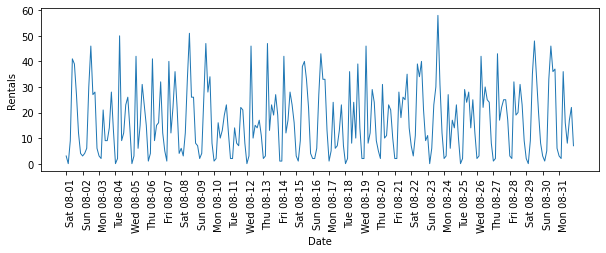

In [199]:
plt.figure(figsize=(10,3))
xticks=pd.date_range(start=citi.index.min(),end=citi.index.max(),freq='D')
plt.xticks(xticks,xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citi, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_11420/3753520037.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x= citi.index.astype("int64").values.reshape(-1, 1) // 10**9


-0.035486463625959086


<Figure size 432x288 with 0 Axes>

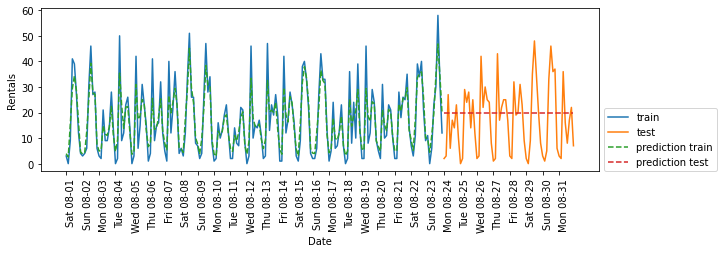

In [218]:
y=citi.values
# index=citi.
x= citi.index.astype("int64").values.reshape(-1, 1) // 10**9
n_train=184
def eval(features,target,regressor):
    xtr,xte=features[:n_train],features[n_train:]
    ytr,yte=target[:n_train],target[n_train:]
    regressor.fit(xtr,ytr)
    print(regressor.score(xte,yte))
    
    ypred=regressor.predict(xte)
    ypred_train=regressor.predict(xtr)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(x),8),xticks.strftime("%a %m-%d"),rotation=90,ha='left')
    
    plt.plot(range(n_train),ytr,label='train')
    plt.plot(range(n_train,len(yte)+n_train),yte,'-',label="test")
    plt.plot(range(n_train),ypred_train,'--',label="prediction train")
    plt.plot(range(n_train, len(yte) + n_train), ypred, '--',
    label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval(x,y,regressor)

0.5995775993305429


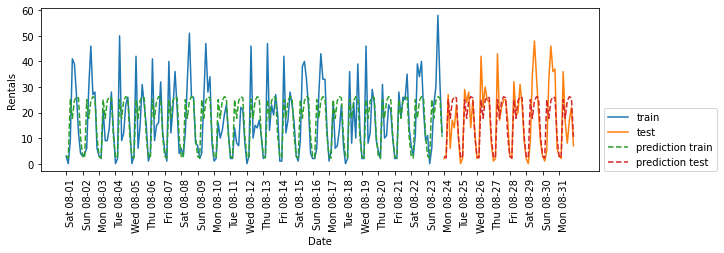

In [229]:
x_hour = citi.index.hour.astype("int64").values.reshape(-1, 1)
eval(x_hour,y,regressor)

In [233]:
x_new=np.hstack([x_hour,citi.index.dayofweek.astype("int64").values.reshape(-1,1)])

0.8419488587966024


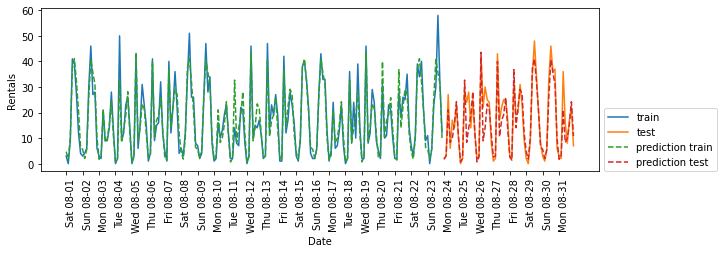

In [237]:
eval(x_new,y,regressor)


0.13204157262163152


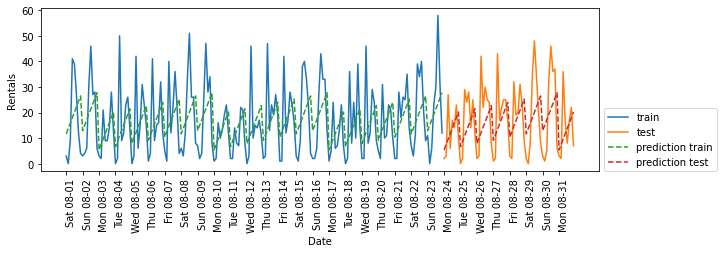

In [239]:
lr=LinearRegression()
eval(x_new,y,lr)




0.6191139168658686


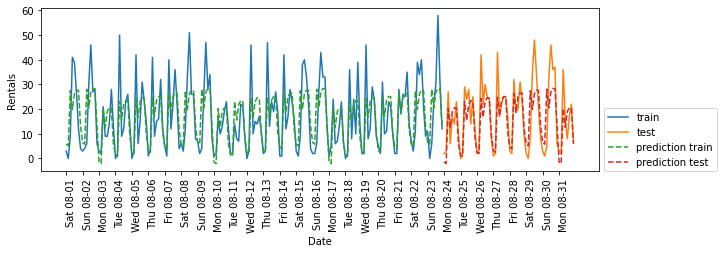

In [241]:
enc=OneHotEncoder()
x_h_w_enc=enc.fit_transform(x_new).toarray()
eval(x_h_w_enc,y,Ridge())

0.8451706357968557


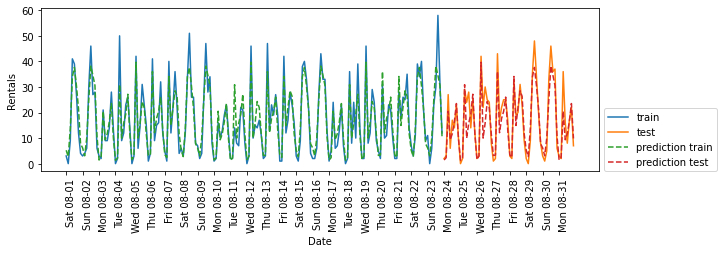

In [243]:
p=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
xhwop=p.fit_transform(x_h_w_enc)
eval(xhwop,y,Ridge())

